# Data Analysis Interview Challenge


## Part 1 ‑ Exploratory data analysis


The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. 

Aggregate these login counts based on 15 minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. 

Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Problem 1 : load data
- load json file
- create a column called`num_logins` that mimics a count of the timestamp on `login_time` to be use later for aggreation
- set `login_time` as index and drop older column


In [2]:
df = pd.read_json('logins.json')
df['num_logins'] = 1
df.set_index(df.login_time,inplace=True)
df.drop(['login_time'],axis=1,inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
num_logins    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [4]:
df.head()

num_logins
login_time                     
1970-01-01 20:13:18           1
1970-01-01 20:16:10           1
1970-01-01 20:16:37           1
1970-01-01 20:16:36           1
1970-01-01 20:26:21           1

### Results
- we have a dataframe whos index are timestamps and a column counting each with a value of 1

## Problem 2
### Aggregate these login counts based on 15 minute time intervals
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.sample.html

- since the dataframe is set as datetime index, we can resample it base on any datetime criteria
- lets resample bases on 15 minutes intervals, then sum up each

In [5]:
samp_15 = df.resample('15Min').sum()

In [6]:
samp_15.head()

num_logins
login_time                     
1970-01-01 20:00:00           2
1970-01-01 20:15:00           6
1970-01-01 20:30:00           9
1970-01-01 20:45:00           7
1970-01-01 21:00:00           1

In [7]:
samp_15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
num_logins    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


### Result
- we have a dataframe called `samp_15` whose index is grouped by 15 minute intervals and the `num_logins` is added by that criteria

## Problem 3
## ...`visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.`

- lets plot our new `sample_15` dataframe


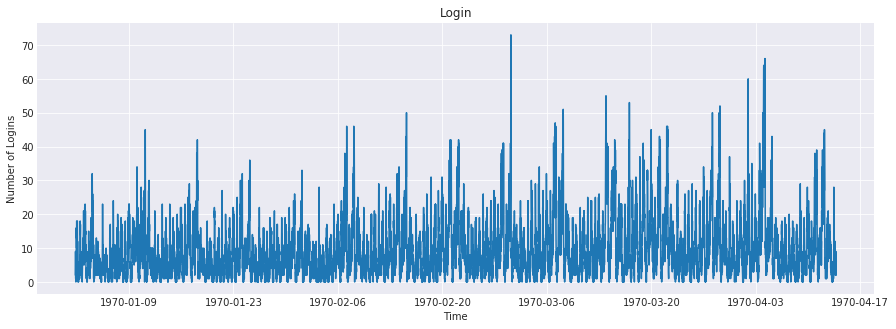

In [8]:
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.title('Login')
# puts the data in the figure
plt.plot(samp_15.index, samp_15.num_logins)
plt.show()

## display by other time interval

In [9]:
df['weekday'] = df.index.strftime('%A')
df['month'] = df.index.strftime('%B')
df['hour'] = df.index.strftime('%H')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 4 columns):
num_logins    93142 non-null int64
weekday       93142 non-null object
month         93142 non-null object
hour          93142 non-null object
dtypes: int64(1), object(3)
memory usage: 3.6+ MB


In [11]:
df.head()

num_logins   weekday    month hour
login_time                                             
1970-01-01 20:13:18           1  Thursday  January   20
1970-01-01 20:16:10           1  Thursday  January   20
1970-01-01 20:16:37           1  Thursday  January   20
1970-01-01 20:16:36           1  Thursday  January   20
1970-01-01 20:26:21           1  Thursday  January   20

In [12]:
df.hour.dtypes

dtype('O')

In [13]:
df.hour = df.hour.astype('int')

In [14]:
df.hour.dtypes

dtype('int64')

## plot

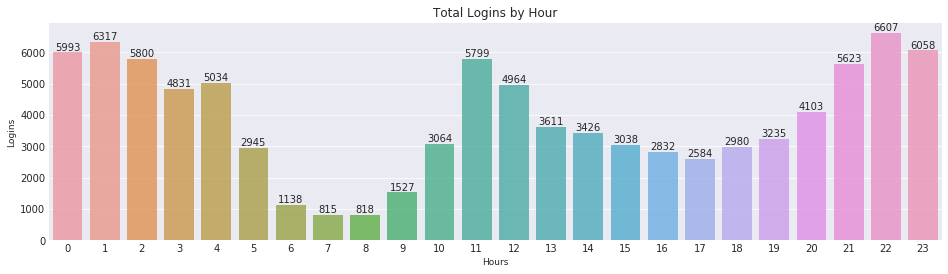

In [16]:
# hours
x=df.groupby(['hour'])['num_logins'].sum()
x=x.sort_index()
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Total Logins by Hour")
plt.ylabel('Logins', fontsize=9)
plt.xlabel('Hours', fontsize=9)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

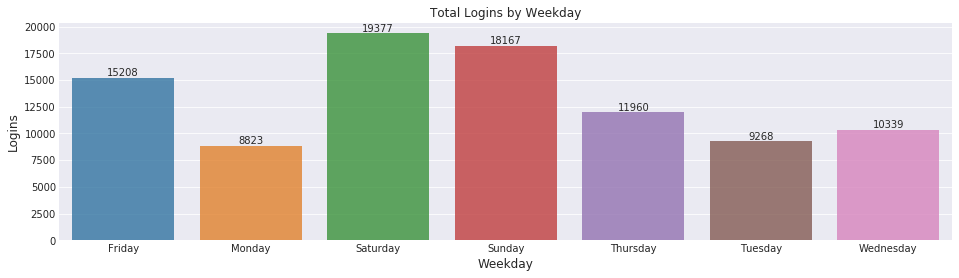

In [17]:
# weekday
x=df.groupby(['weekday'])['num_logins'].sum()
#x=x.sort_index()
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Total Logins by Weekday")
plt.ylabel('Logins', fontsize=12)
plt.xlabel('Weekday', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

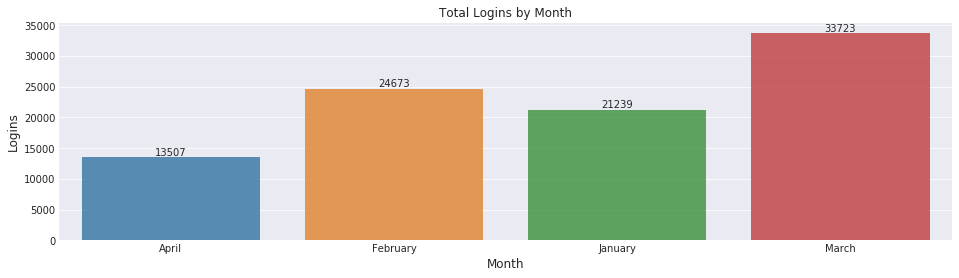

In [18]:
# month
x=df.groupby(['month'])['num_logins'].sum()
x=x.sort_index()
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Total Logins by Month")
plt.ylabel('Logins', fontsize=12)
plt.xlabel('Month', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

## Results
- March has the most logins with 33,723
- saturday has the most logins with 19,337
- hours with the most action are
    - 10 pm with 6,070
    - 1 am with 6,317
    - 11 pm with 6,058

## display trend on weekdays an hours

In [19]:
df.head()

num_logins   weekday    month  hour
login_time                                              
1970-01-01 20:13:18           1  Thursday  January    20
1970-01-01 20:16:10           1  Thursday  January    20
1970-01-01 20:16:37           1  Thursday  January    20
1970-01-01 20:16:36           1  Thursday  January    20
1970-01-01 20:26:21           1  Thursday  January    20

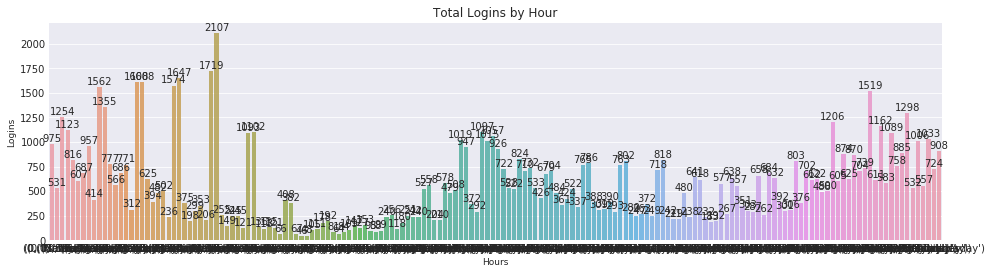

In [20]:
# hour,weekday
# BAAAAADDDDD

x=df.groupby(['hour','weekday'])['num_logins'].sum()
x=x.sort_index()
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Total Logins by Hour")
plt.ylabel('Logins', fontsize=9)
plt.xlabel('Hours', fontsize=9)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

## groupby and unstack

In [21]:
wkd_hr = df.groupby(['hour','weekday'])['num_logins',].sum()

In [22]:
wkd_hr.head()

num_logins
hour weekday             
0    Friday           975
     Monday           531
     Saturday        1254
     Sunday          1123
     Thursday         816

In [23]:
wkd_hr = wkd_hr.unstack()

In [25]:
wkd_hr.head()

num_logins                                                  
weekday     Friday Monday Saturday Sunday Thursday Tuesday Wednesday
hour                                                                
0              975    531     1254   1123      816     607       687
1              957    414     1562   1355      777     566       686
2              771    312     1608   1608      625     394       482
3              502    236     1574   1647      375     198       299
4              353    206     1719   2107      255     149       245

### Plot 

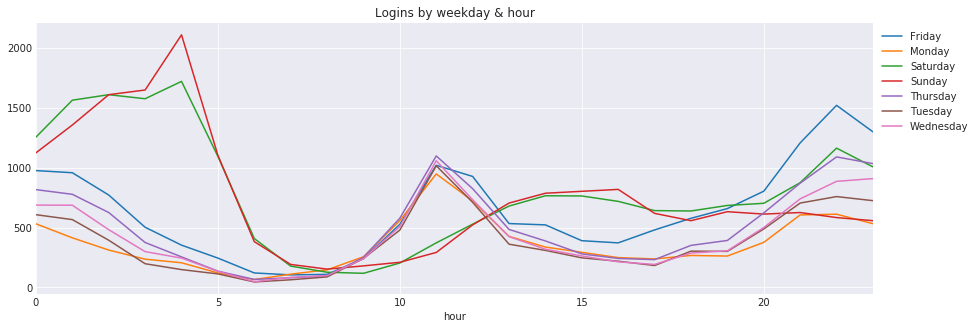

In [27]:
# plot data
# BEEETTTER!
fig, ax = plt.subplots(figsize=(15,5))
# use unstack()
df.groupby(['hour','weekday']).count()['num_logins'].unstack().plot(ax=ax).legend(bbox_to_anchor=(1, 1))
ax.set_xlim(0,23)
plt.title('Logins by weekday & hour')
plt.show()

## Result
- Weekend trends are diffrent thatn weekdays
    - Sundays & Saturdays are active before 5 am
- Weekdays are active at 11 am

---
# Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats. 


**1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?**

A critical measurement of success would be determined by how profitable the strategy is, including the factor of toll reimbursement cost to get a sense of a proper metric, where the parameters would be the total profit per fit for each partner.


**2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.**

- compare average current revenue for both cities as a start
- implement the new policy where each town is reimbursed base on usage
- if new values are successful, keep the new system, else perform a new one or drop it altogether

---
# Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

---
## Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

### Load data

In [28]:
import json

In [29]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

In [30]:
df = pd.DataFrame(data)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [32]:
df.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                 True         46.2  
1                       0                False         50.0  
2                       3                False        100.0  
3                       9                 True         80.0  
4                      14                False         82.4

# clean data

### display null values

In [34]:
df.apply(lambda x: sum(x.isnull()))

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

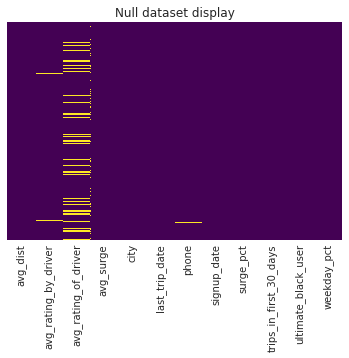

In [35]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## inspect categorical columns

In [36]:
df.city.value_counts(dropna=False)

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [37]:
df.phone.value_counts(dropna=False)

iPhone     34582
Android    15022
NaN          396
Name: phone, dtype: int64

In [38]:
df.ultimate_black_user.value_counts(dropna=False)

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

## Change dtypes of columns

```
avg_dist                  float64  ok
avg_rating_by_driver      float64  ok
avg_rating_of_driver      float64  ok
avg_surge                 float64  ok
city                       object  cat?
last_trip_date             object  datetime
phone                      object  cat?
signup_date                object  datetime
surge_pct                 float64  ok
trips_in_first_30_days      int64  ok
ultimate_black_user          bool  ok
weekday_pct               float64  ok
```

In [39]:
df.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
ultimate_black_user          bool
weekday_pct               float64
dtype: object

In [40]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [41]:
df.city = df.city.astype('category')
df.phone = df.phone.astype('category')
df.ultimate_black_user = df.ultimate_black_user.astype('int')

In [42]:
df.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                            category
last_trip_date            datetime64[ns]
phone                           category
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                int64
weekday_pct                      float64
dtype: object

In [43]:
df.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                    1         46.2  
1                       0                    0         50.0  
2                       3                    0        100.0  
3                       9                    1         80.0  
4                      14                    0         82.4

### Ultimate is intrested in predicting rider retention.
- The dataset is a sample of a cohor of users who sighend up for an Ultimate account in Jan 2014
- it was pulled several months later `data> Jan 2014`
- user retain if they were "active"(took a trip) in the preceding 30 days.

#### Task
- use data to understadn what factors are the best predictors for retention
- offer suggestions to implement them


1. Perform any cleaning, exploratory analysis, and/or visualizations
    - a few sentences/plots describing your approach will suffice
---

## What fraction of the observed users were retained?
- find how many users were active withing 30 days from the last day of dataset

### date exploration
- find first,last `signup_date`
- find first,last `last_trip_date`

In [44]:
fs = df.signup_date.min()
ls = df.signup_date.max()
ft = df.last_trip_date.min()
lt = df.last_trip_date.max()

In [45]:
print('first signup date was:\t{}\nlast signup date was:\t{}'.format(fs,ls))
print('first last trip date was:\t{}\nlast last trip date was:\t{}'.format(ft,lt))

first signup date was:	2014-01-01 00:00:00
last signup date was:	2014-01-31 00:00:00
first last trip date was:	2014-01-01 00:00:00
last last trip date was:	2014-07-01 00:00:00


In [46]:
# last day of dataset will be used for time calculations
max_date_data = df.last_trip_date.max()  # 07/01/2014

In [47]:
df['days_active_from_range'] = abs(df.last_trip_date - max_date_data)  # num of days active since last dataset call

In [48]:
df.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  \
0                       4                    1         46.2   
1                       0                    0         50.0   
2                       3                    0        100.0   
3                       9                    1         80.0   
4                      14                    0         82.4   

  days_active_from_range  
0                14 days  
1                57 days  
2               175 days  
3                 2 days  
4               108 days

In [49]:
# if user had a trip within 30 days from range :1, otherwise 0
df['retained'] = (df.days_active_from_range <= pd.Timedelta('30 days')).astype('int')

In [50]:
df.retained.value_counts()

0    31196
1    18804
Name: retained, dtype: int64

In [51]:
inactive = df[df.retained == 0]
active = df[df.retained == 1]

In [52]:
result = len(active)/(len(inactive)+len(active))*100
print('Total of {0:0.2f} % of users were retained'.format(result))
med_range = df.days_active_from_range.median()
print('Users remain active with a median range of {} days'.format(med_range.days))

Total of 37.61 % of users were retained
Users remain active with a median range of 54 days


---

#### Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. 
#### Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?
#### Include any key indicators of model performance.

In [53]:
df.apply(lambda x: sum(x.isnull()))

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
days_active_from_range       0
retained                     0
dtype: int64

## dealing with missing categorical data

In [54]:
data = df.copy()  # make a copy

In [55]:
# drop missinc phone data
data.dropna(subset=['phone'],inplace=True)

In [56]:
data.apply(lambda x: sum(x.isnull()))

avg_dist                     0
avg_rating_by_driver       198
avg_rating_of_driver      8026
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
days_active_from_range       0
retained                     0
dtype: int64

In [57]:
data['avg_rating_by_driver'].fillna((data['avg_rating_by_driver'].mean()), inplace=True)  # we will get mean value for now
data['avg_rating_of_driver'].fillna((data['avg_rating_of_driver'].mean()), inplace=True)  # we will get mean value for now

In [58]:
data.apply(lambda x: sum(x.isnull()))

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
days_active_from_range    0
retained                  0
dtype: int64

## split data
- drop dates since the values were extracted on `retained`
- our target will be `retained` column that we are tryingn to predict
- our features will be all other columns

In [59]:
data.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  \
0                       4                    1         46.2   
1                       0                    0         50.0   
2                       3                    0        100.0   
3                       9                    1         80.0   
4                      14                    0         82.4   

  days_active_from_range  retained  
0                14 days         1  
1                57 days         0  
2               175 days         0  
3                 2 days         1  
4               108 days         0

In [60]:
data.drop(['last_trip_date', 'signup_date','days_active_from_range'], axis=1, inplace=True)

In [61]:
data.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city    phone  surge_pct  trips_in_first_30_days  \
0  King's Landing   iPhone       15.4                       4   
1         Astapor  Android        0.0                       0   
2         Astapor   iPhone        0.0                       3   
3  King's Landing   iPhone       20.0                       9   
4      Winterfell  Android       11.8                      14   

   ultimate_black_user  weekday_pct  retained  
0                    1         46.2         1  
1                    0         50.0         0  
2                    0        100.0         0  
3                    1         80.0         1  
4                    0         82.4         0

In [62]:
data = pd.get_dummies(data,drop_first=True)  # create dummies for categorical values

In [63]:
data.head()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  surge_pct  \
0      3.67                   5.0                   4.7       1.10       15.4   
1      8.26                   5.0                   5.0       1.00        0.0   
2      0.77                   5.0                   4.3       1.00        0.0   
3      2.36                   4.9                   4.6       1.14       20.0   
4      3.13                   4.9                   4.4       1.19       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  retained  \
0                       4                    1         46.2         1   
1                       0                    0         50.0         0   
2                       3                    0        100.0         0   
3                       9                    1         80.0         1   
4                      14                    0         82.4         0   

   city_King's Landing  city_Winterfell  phone_iPhone  
0                    1                0             1  
1                    0                0             0  
2                    0                0             1  
3                    1                0             1  
4                    0                1             0

In [64]:
X = data.drop('retained', axis=1)
y = data['retained']

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve

In [66]:
# imp = Imputer(missing_values='NaN', strategy='mean',axis=0)
# imp.fit(X)
# X = imp.transform(X)

## Logistic Regression
- apply gridsearchcv to find best parameters

In [67]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid,cv=5)

# Fit it to the training data

logreg_cv.fit(X_train,y_train)
# Print the optimal parameters and best score
print("Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Logistic Regression Parameter: {'C': 0.05179474679231213, 'penalty': 'l1'}
Logistic Regression Accuracy: 0.7200120959612929


In [68]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(C=0.43,penalty='l1')

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

print('accuracy: {}'.format(accuracy_score(y_test,y_pred)))

accuracy: 0.7163592379800423


In [69]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.85      0.79     12344
          1       0.67      0.50      0.57      7498

avg / total       0.71      0.72      0.71     19842



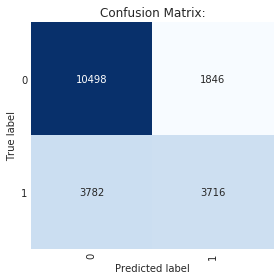

In [70]:
title = 'Confusion Matrix:'
labels =list(np.unique(y))
cm = confusion_matrix(y_test, y_pred,labels=labels)
plt.figure(figsize = (4,4))
g = sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Blues",xticklabels=True,yticklabels=True)
g.set_yticklabels(labels, rotation =0)
g.set_xticklabels(labels, rotation =90)
plt.title(title)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

## ROC Curve

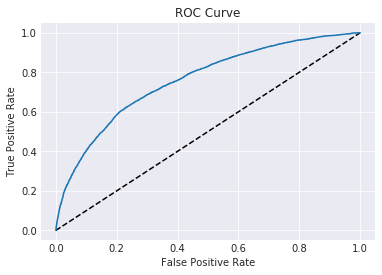

In [71]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, treshold = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## find feature importance

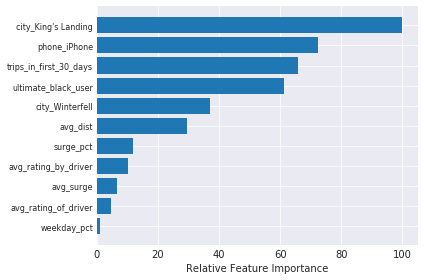

In [72]:
import numpy as np    
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

#Scale your data
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled, y)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

## Results
- with little efort we get an accuray of 0.71
- feature with the most importance seems to be King's landing, folowed by iphone users.
- ratings dont seem very important along with weekday trip %
- recomendations would include larger datase,atempting other classifiers like SVC.